In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([
    [3,   -0.1, -0.2],
    [0.1,  7,   -0.3],
    [0.3, -0.2, 10]
], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)

x0 = np.array([0.0, 0.0, 0.0])

tolerances = [1e-3, 1e-6, 1e-9]

max_iterations = 1000


In [2]:
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []

    for k in range(max_iterations):
        x_new = np.zeros_like(x)

        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]

        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)

        if error < tol:
            return x_new, k+1, errors

        x = x_new

    return x, max_iterations, errors

In [3]:
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []

    for k in range(max_iterations):
        x_new = x.copy()

        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)

        if error < tol:
            return x_new, k+1, errors

        x = x_new

    return x, max_iterations, errors

Tolerance: 0.001
Jacobi:
 Solution: [ 3.0000225  -2.50000266  6.99998104]
 Iterations: 4
Gauss-Seidel:
 Solution: [ 3.00000035 -2.50000004  6.99999999]
 Iterations: 4


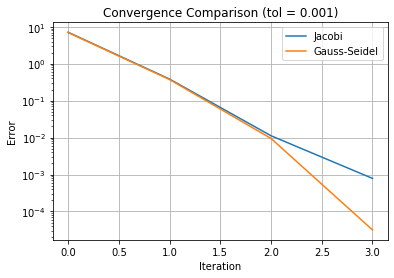

Tolerance: 1e-06
Jacobi:
 Solution: [ 3.  -2.5  7. ]
 Iterations: 7
Gauss-Seidel:
 Solution: [ 3.  -2.5  7. ]
 Iterations: 5


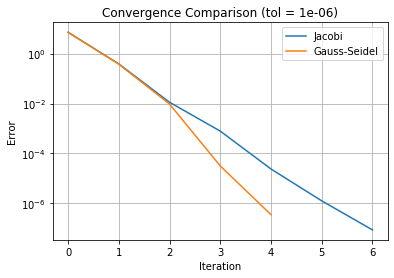

Tolerance: 1e-09
Jacobi:
 Solution: [ 3.  -2.5  7. ]
 Iterations: 9
Gauss-Seidel:
 Solution: [ 3.  -2.5  7. ]
 Iterations: 7


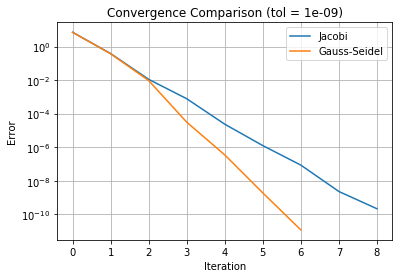

In [8]:
for tol in tolerances:
    print(f"Tolerance: {tol}")

    x_jacobi, it_jacobi, err_jacobi = jacobi(A, b, x0, tol, max_iterations)
    x_gs, it_gs, err_gs = gauss_seidel(A, b, x0, tol, max_iterations)

    print("Jacobi:")
    print(" Solution:", x_jacobi)
    print(" Iterations:", it_jacobi)

    print("Gauss-Seidel:")
    print(" Solution:", x_gs)
    print(" Iterations:", it_gs)


    plt.figure()
    plt.semilogy(err_jacobi, label="Jacobi")
    plt.semilogy(err_gs, label="Gauss-Seidel")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title(f"Convergence Comparison (tol = {tol})")
    plt.legend()
    plt.grid(True)
    plt.show()

As the tolerance gets smaller, the algorithm has to run longer in order to reduce the error between approximations. As a result, more iterations are needed to do this. 

ChatGPT was prompted to fix errors and adjust so that each comparison provided its own graph, since I was stuck on only generating one.